## HISTOGRAM EQUALIZATION

In [31]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import gdown
import os

In [ ]:
# Download gambar
url = 'https://drive.google.com/uc?id=1jwrW5d4AmUutLl0hUscOePqimXO8IBFS'
output = 'image.jpg'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1jwrW5d4AmUutLl0hUscOePqimXO8IBFS
To: C:\Windows\System32\image.jpg
100%|███████████████████████████████████████████████████████████████████████████████| 143k/143k [00:00<00:00, 4.11MB/s]


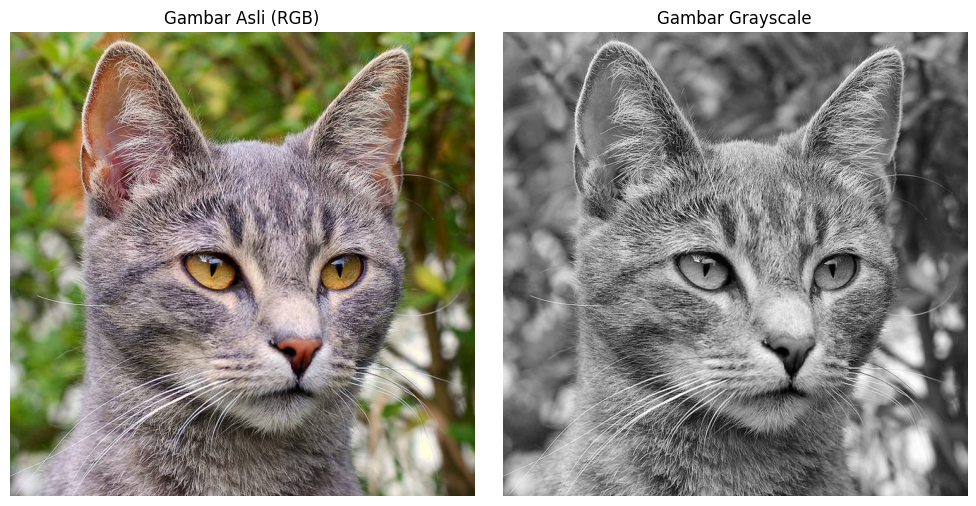

In [38]:
image = cv2.imread('image.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
# Gambar RGB
axes[0].imshow(image_rgb)
axes[0].set_title("Gambar Asli (RGB)")
axes[0].axis("off")

# Gambar Grayscale
axes[1].imshow(image_gray, cmap="gray")
axes[1].set_title("Gambar Grayscale")
axes[1].axis("off")

plt.tight_layout()
plt.show()

### Histogram equalization pada Grayscale

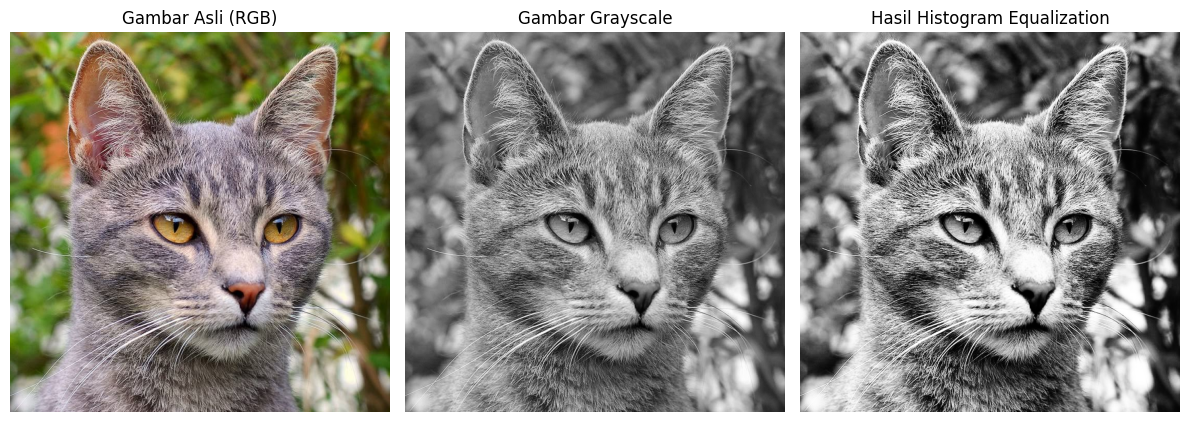

In [41]:
# Lakukan histogram equalization
equalized_image = cv2.equalizeHist(image_gray)

fig, axes = plt.subplots(1, 3, figsize=(12, 7))

# Gambar Asli (RGB)
axes[0].imshow(image_rgb)
axes[0].set_title("Gambar Asli (RGB)")
axes[0].axis("off")

# Gambar Grayscale
axes[1].imshow(gray_image, cmap="gray")
axes[1].set_title("Gambar Grayscale")
axes[1].axis("off")

# Gambar setelah Histogram Equalization
axes[2].imshow(equalized_image, cmap="gray")
axes[2].set_title("Hasil Histogram Equalization")
axes[2].axis("off")

plt.tight_layout()
plt.show()

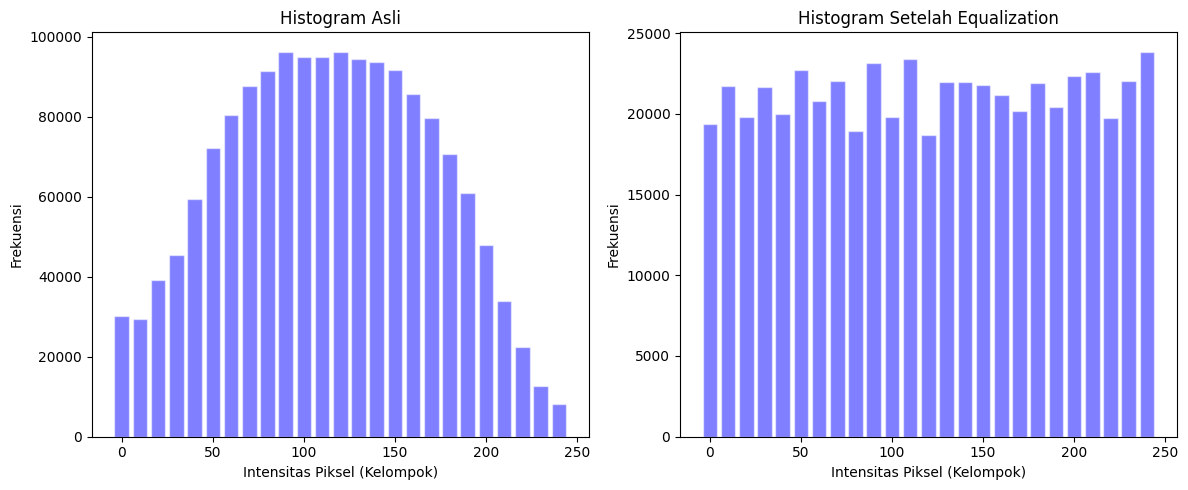

In [45]:
bin_size = 10
bins = np.arange(0, 256, bin_size)
hist_original, _ = np.histogram(image, bins=bins)
hist_equalized, _ = np.histogram(equalized_image, bins=bins)

# Plot histogram
plt.figure(figsize=(12, 5))

# Histogram Asli
plt.subplot(1, 2, 1)
plt.bar(bins[:-1], hist_original, width=8, color='blue', edgecolor='white', alpha=0.5)
plt.title("Histogram Asli")
plt.xlabel("Intensitas Piksel (Kelompok)")
plt.ylabel("Frekuensi")
plt.xticks(np.arange(0, 256, 50)) 

# Histogram Setelah Equalization
plt.subplot(1, 2, 2)
plt.bar(bins[:-1], hist_equalized, width=8, color='blue', edgecolor='white', alpha=0.5)
plt.title("Histogram Setelah Equalization")
plt.xlabel("Intensitas Piksel (Kelompok)")
plt.ylabel("Frekuensi")
plt.xticks(np.arange(0, 256, 50))

plt.tight_layout()
plt.show()

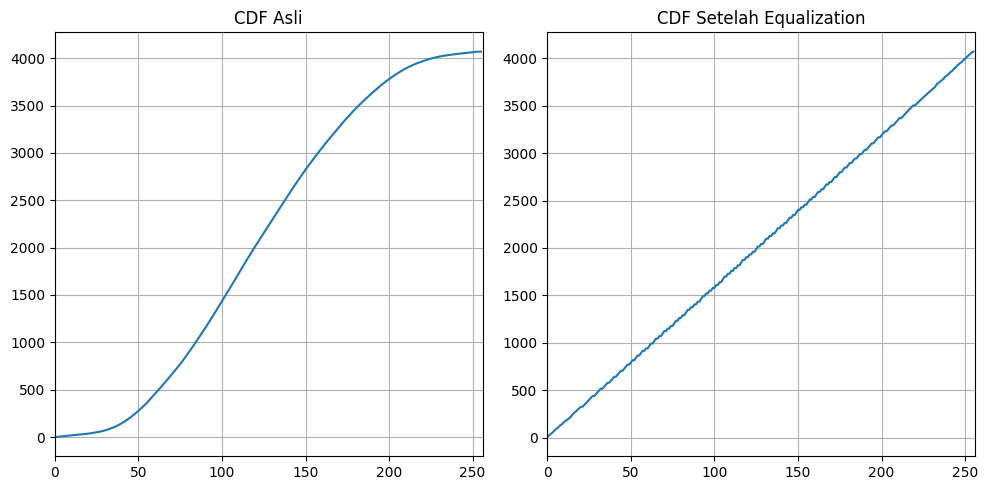

In [49]:
plt.figure(figsize=(10, 5))

# Tampilan CDF sebelum equalization
plt.subplot(1, 2, 1)
plt.title('CDF Asli')
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized)
plt.xlim([0, 256])
plt.grid(True)

# Tampilan CDF setelah equalization
plt.subplot(1, 2, 2)
plt.title('CDF Setelah Equalization')
cdf_eq = hist_eq.cumsum()
cdf_eq_normalized = cdf_eq * float(hist_eq.max()) / cdf_eq.max()
plt.plot(cdf_eq_normalized)
plt.xlim([0, 256])
plt.grid(True)

plt.tight_layout()
plt.show()

### Histogram equalization pada RGB

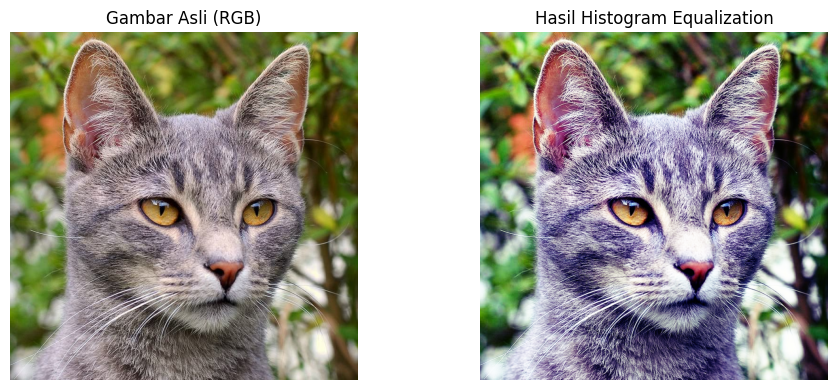

In [50]:
# Pisahkan channels warna
b, g, r = cv2.split(image)

b_eq = cv2.equalizeHist(b)
g_eq = cv2.equalizeHist(g)
r_eq = cv2.equalizeHist(r)

equalized_color = cv2.merge((b_eq, g_eq, r_eq))
equalized_color_rgb = cv2.cvtColor(equalized_color, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title('Gambar Asli (RGB)')
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Hasil Histogram Equalization')
plt.imshow(equalized_color_rgb)
plt.axis('off')

plt.tight_layout()
plt.show()

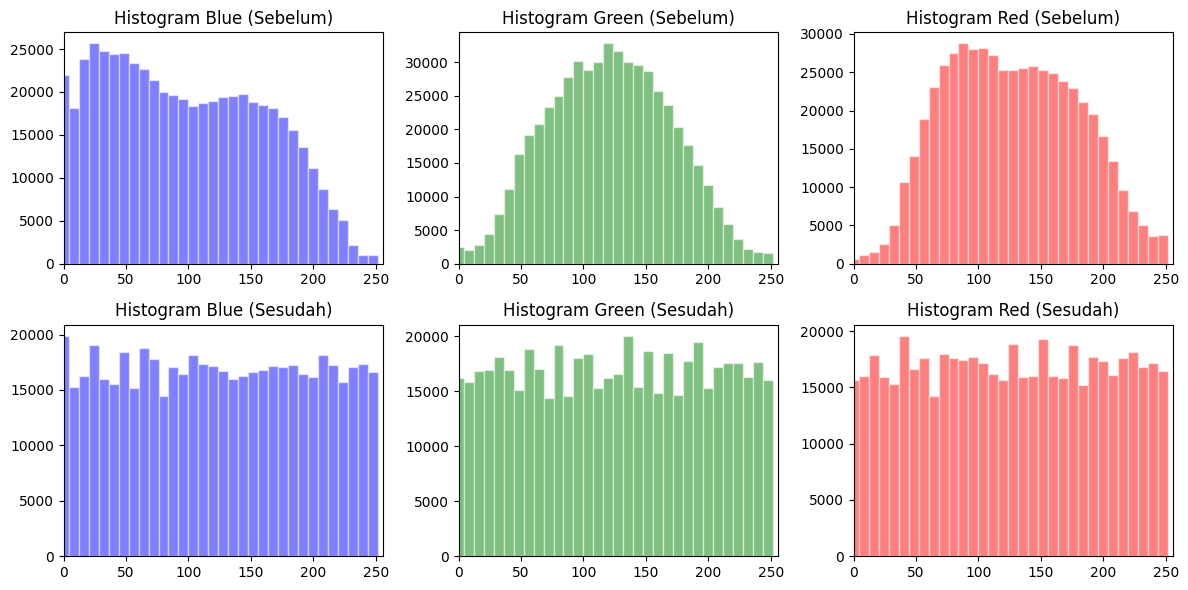

In [55]:
# Membuat histogram
colors = ('b', 'g', 'r')
titles = ('Histogram Blue', 'Histogram Green', 'Histogram Red')

fig, axes = plt.subplots(2, 3, figsize=(12, 6))
num_bins = 32  

for i, (color, title) in enumerate(zip(colors, titles)):
    # Histogram sebelum equalization
    hist_orig, bins = np.histogram(image[:, :, i].ravel(), bins=num_bins, range=[0, 256])
    axes[0, i].bar(bins[:-1], hist_orig, width=256/num_bins, color=color, edgecolor='white', alpha=0.5)
    axes[0, i].set_title(f"{title} (Sebelum)")
    axes[0, i].set_xlim([0, 256])

    # Histogram setelah equalization
    hist_eq, bins = np.histogram(equalized_color[:, :, i].ravel(), bins=num_bins, range=[0, 256])
    axes[1, i].bar(bins[:-1], hist_eq, width=256/num_bins, color=color, edgecolor='white', alpha=0.5)
    axes[1, i].set_title(f"{title} (Sesudah)")
    axes[1, i].set_xlim([0, 256])

plt.tight_layout()
plt.show()

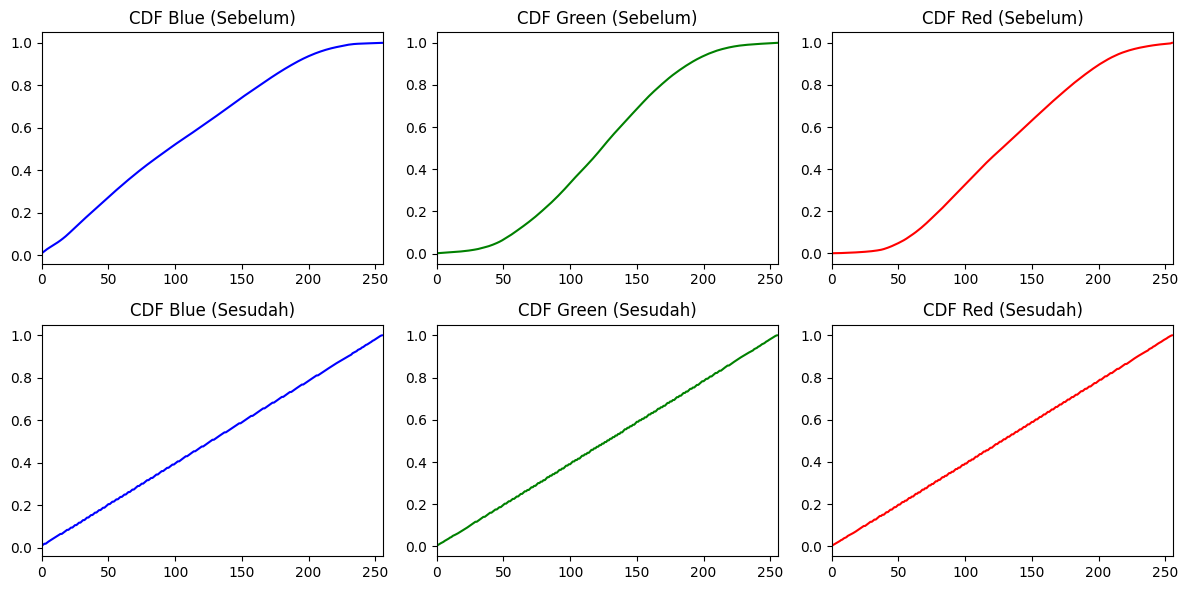

In [56]:
# Melakukan histogram equalization per channel
channels = cv2.split(image)
equalized_channels = [cv2.equalizeHist(ch) for ch in channels]
equalized_color = cv2.merge(equalized_channels)

colors = ('b', 'g', 'r')
titles = ('CDF Blue', 'CDF Green', 'CDF Red')
fig, axes = plt.subplots(2, 3, figsize=(12, 6))

for i, (color, title) in enumerate(zip(colors, titles)):
    # Histogram dan CDF sebelum equalization
    hist_orig, bins = np.histogram(image[:, :, i].ravel(), bins=256, range=[0, 256])
    cdf_orig = hist_orig.cumsum() 
    cdf_orig = cdf_orig / cdf_orig.max()  
    
    axes[0, i].plot(cdf_orig, color=color)
    axes[0, i].set_title(f"{title} (Sebelum)")
    axes[0, i].set_xlim([0, 256])
    
    # Histogram dan CDF setelah equalization
    hist_eq, bins = np.histogram(equalized_color[:, :, i].ravel(), bins=256, range=[0, 256])
    cdf_eq = hist_eq.cumsum()  
    cdf_eq = cdf_eq / cdf_eq.max() 
    
    axes[1, i].plot(cdf_eq, color=color)
    axes[1, i].set_title(f"{title} (Sesudah)")
    axes[1, i].set_xlim([0, 256])

plt.tight_layout()
plt.show()